# Reconnaissance des Digits basée sur les enregistrements Audios 

### Importer les bibliothéques necessaires 

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("whitegrid", {'axes.grid' : False})
sb.set(font_scale = 2)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

In [2]:
from Tools.tools import rec
from Tools.tools import collection

### Collection 

In [3]:
# collection()

#### 1. Importer votre DataSet

In [4]:
mydata = pd.read_csv('./DataSet/'+os.listdir('./DataSet/')[0])

##### Print

In [5]:
mydata.head()

,Fe1,Fe2,Fe3,Fe4,Fe5,Fe6,Fe7,Fe8,Fe9,Fe10,Fe11,Fe12,Target
0,12.607351,-22.400816,-1.616791,-7.391559,-2.244558,-9.111102,0.237806,0.712023,1.189393,1.758172,-1.742375,-2.593895,0.0
1,12.334870,-11.213629,-6.550703,-11.956777,2.136547,-4.668772,1.372930,-2.039695,2.678504,8.383901,-1.087158,-6.082545,1.0
2,10.660119,-22.497527,-1.015792,-7.884444,-1.212321,-6.523361,0.397493,0.929390,1.252849,2.049277,-2.432330,-5.685531,2.0
3,15.432565,-21.435025,-6.452266,-8.672601,-2.460852,-7.846692,0.619813,1.149285,2.248097,2.495668,1.425382,-2.641306,3.0
4,10.443099,-15.331559,-8.451362,-10.388280,-3.406530,-10.486777,3.599802,5.361110,4.298604,5.562914,0.894111,-3.741900,4.0


In [6]:
print(mydata)


           Fe1        Fe2        Fe3        Fe4       Fe5        Fe6  \
0    12.607351 -22.400816  -1.616791  -7.391559 -2.244558  -9.111102   
1    12.334870 -11.213629  -6.550703 -11.956777  2.136547  -4.668772   
2    10.660119 -22.497527  -1.015792  -7.884444 -1.212321  -6.523361   
3    15.432565 -21.435025  -6.452266  -8.672601 -2.460852  -7.846692   
4    10.443099 -15.331559  -8.451362 -10.388280 -3.406530 -10.486777   
..         ...        ...        ...        ...       ...        ...   
105  12.674759 -13.258004  -7.682607  -6.426176 -1.400366 -10.031839   
106  13.757265 -17.225183 -12.112339  -1.040721  0.476273 -14.038060   
107  13.215193 -13.418359  -7.862219  -4.383815 -2.774445 -12.829156   
108  11.037619 -13.034576  -4.282365  -6.448234 -1.299105 -10.983215   
109  12.267933 -12.711588  -9.190356  -8.692272  1.827136  -8.815610   

          Fe7       Fe8       Fe9       Fe10      Fe11       Fe12  Target  
0    0.237806  0.712023  1.189393   1.758172 -1.742375  -2.

In [7]:
mydata.shape

(110, 13)

#### 2. Checker les variables quantitatives/qualitatives et les valeurs manquantes 

In [8]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fe1     110 non-null    float64
 1   Fe2     110 non-null    float64
 2   Fe3     110 non-null    float64
 3   Fe4     110 non-null    float64
 4   Fe5     110 non-null    float64
 5   Fe6     110 non-null    float64
 6   Fe7     110 non-null    float64
 7   Fe8     110 non-null    float64
 8   Fe9     110 non-null    float64
 9   Fe10    110 non-null    float64
 10  Fe11    110 non-null    float64
 11  Fe12    110 non-null    float64
 12  Target  110 non-null    float64
dtypes: float64(13)
memory usage: 11.3 KB


In [9]:
mydata.shape

(110, 13)

In [10]:
mydata.columns

Index(['Fe1', 'Fe2', 'Fe3', 'Fe4', 'Fe5', 'Fe6', 'Fe7', 'Fe8', 'Fe9', 'Fe10',
       'Fe11', 'Fe12', 'Target'],
      dtype='object')

In [11]:
print(mydata.isnull().sum())

Fe1       0
Fe2       0
Fe3       0
Fe4       0
Fe5       0
Fe6       0
Fe7       0
Fe8       0
Fe9       0
Fe10      0
Fe11      0
Fe12      0
Target    0
dtype: int64


In [12]:
mydata['Target'].value_counts()

9.0    11
8.0    11
7.0    11
6.0    11
5.0    11
4.0    11
3.0    11
2.0    11
1.0    11
0.0    11
Name: Target, dtype: int64

In [13]:
mydata['Target'].nunique()

10

In [14]:
mydata['Target'].unique()

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

#### 3. Visualiser les targets

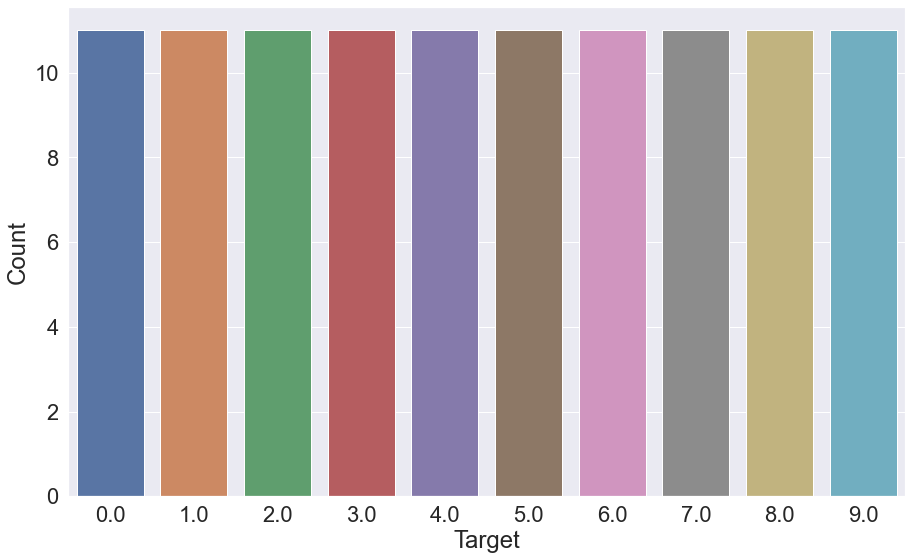

In [15]:
plt.figure(1,figsize=(15,9))
sb.countplot(x='Target', data=mydata)
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

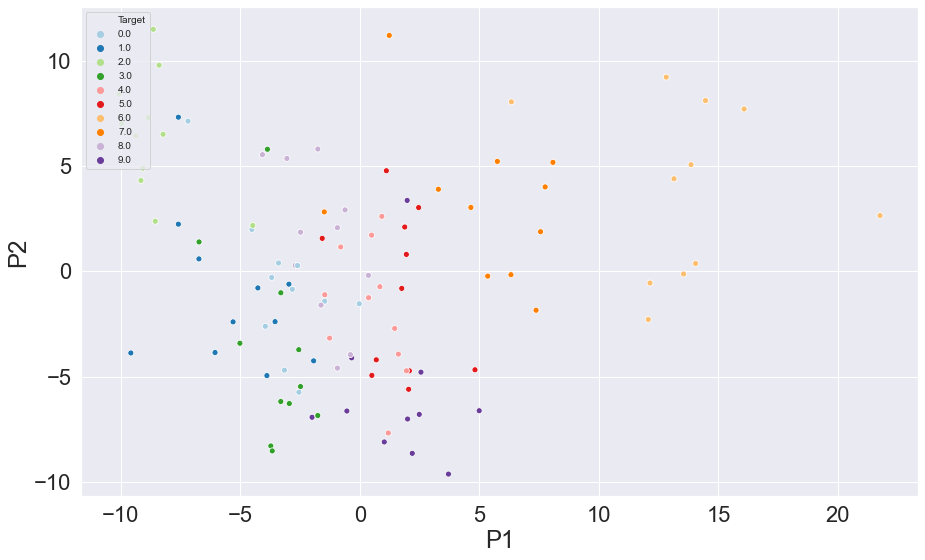

In [16]:
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df2 = pd.DataFrame(pca.fit_transform(mydata.iloc[:, :-1]))

df2["Target"] = mydata["Target"]
df2.columns = ["P1","P2","Target"]


plt.figure(1,figsize=(15,9))
plt.clf()
sns.scatterplot(x="P1",y="P2",hue="Target",data=df2, palette = "Paired")



#plt.plot(x,y,"+")

plt.xlabel('P1')
plt.ylabel('P2')
plt.legend(loc=2, prop={'size': 10})
plt.show()

#### 4. Notre variable target (Y) est 'gender', Récuprer X et y à partir du jeu de données 

In [17]:
y = mydata['Target']
X = mydata.iloc[:,:-1]
X.shape

(110, 12)

#### 5. Diviser la DataSet en donneés d'apprentissage et de test (20% pour le test)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('Train:', X_train.shape, 'Test:', X_test.shape)

Train: (88, 12) Test: (22, 12)


#### 6. Appliquer une normalisation centrée-réduite aux données en utilisant "StandardScaler"

In [30]:
# from sklearn.preprocessing import StandardScaler
    
# scaler = StandardScaler() 
# scaler.fit(X_train)

#### 7. Développer votre meilleur modèle de classification

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
model_name = ['svc', 'knn', 'decision_tree', 'random_forest', 'boost', 'XGB', 'MLP']
pipelines = [
             Pipeline([('scaler', StandardScaler()), ('svc', SVC())]),
             Pipeline([('scaler', StandardScaler()), ('knn',  KNeighborsClassifier())]),
             Pipeline([('scaler', StandardScaler()), ('decision_tree', DecisionTreeClassifier())]),
             Pipeline([('scaler', StandardScaler()), ('forest', RandomForestClassifier())]),
             Pipeline([('scaler', StandardScaler()), ('boost', GradientBoostingClassifier())]),
             Pipeline([('scaler', StandardScaler()), ('XGB', XGBClassifier())]),
             Pipeline([('scaler', StandardScaler()), ('MLP', MLPClassifier())])]

parameters =[{'svc__kernel': ['linear', 'rbf'],
               'svc__C':[1, 10]}, 
            {'knn__n_neighbors': np.arange(1, 10), 
              'knn__metric':["euclidean", "minkowski", "manhattan"]},
             {},
             {'forest__n_estimators': np.arange(100, 125)},
             {'boost__loss' : ['deviance', 'boost__exponential'], 'boost__learning_rate' : [0.1, 0.2, 0.3]},
             {'XGB__eta' : [0.1, 0.2, 0.3, 0.4], 'XGB__max_depth' : [2, 4, 6, 8, 10], 'XGB__eval_metric' : ['mlogloss']},
             {'MLP__hidden_layer_sizes' : [(50,), (100,), (150,)], 'MLP__activation' : ['identity', 'logistic', 'tanh', 'relu']}]


score = []
best_param = []


for model, p, name in zip(pipelines, parameters, model_name):
        exp = GridSearchCV(model, param_grid = p)
        exp.fit(X_train, y_train)
        score.append([name, exp.score(X_test, y_test), exp.best_params_])
        #best_param.append(exp.best_params_)
print(score)

[['svc', 0.8636363636363636, {'svc__C': 10, 'svc__kernel': 'rbf'}], ['knn', 0.8181818181818182, {'knn__metric': 'euclidean', 'knn__n_neighbors': 1}], ['decision_tree', 0.5909090909090909, {}], ['random_forest', 0.7727272727272727, {'forest__n_estimators': 104}], ['boost', 0.6363636363636364, {'boost__learning_rate': 0.1, 'boost__loss': 'deviance'}], ['XGB', 0.6363636363636364, {'XGB__eta': 0.4, 'XGB__eval_metric': 'mlogloss', 'XGB__max_depth': 2}], ['MLP', 0.8636363636363636, {'MLP__activation': 'tanh', 'MLP__hidden_layer_sizes': (150,)}]]


### Application en Temps Réel

In [31]:
from Tools.tools import rec
from Tools.tools import collection

In [32]:
model = SVC(C= 1, kernel= 'rbf')
model.fit(X_train, y_train)

SVC(C=1)

In [33]:
from sklearn.preprocessing import StandardScaler
    
scaler = StandardScaler() 
scaler.fit(X_train)

StandardScaler()

In [43]:
rec(scaler, model)

Attention, l'enregistrement commence dans :
5
4
3
2
1
0
Prononcer votre Digit : 


------------------
Digit :  0.0
------------------


In [35]:
import joblib
joblib.dump(MLPClassifier(activation='identity', hidden_layer_sizes = (150,)) , 'model_MLP')

['model_MLP']

In [36]:
m_jlib = joblib.load('model_MLP')
m_jlib.fit(X_train, y_train)

MLPClassifier(activation='identity', hidden_layer_sizes=(150,))

In [41]:
rec(scaler, m_jlib)

Attention, l'enregistrement commence dans :
5
4
3
2
1
0
Prononcer votre Digit : 


------------------
Digit :  6.0
------------------
